In [1]:
import pandas as pd
import numpy as np
import cv2 
import os
import itertools
import shutil
import imutils
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from glob import glob
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [8]:
Data = glob('./chest_xray/**/**/*.jpeg', recursive=True)  #we extract only jpg files


In [9]:
print(len(Data))

17568


In [10]:
Data

['./chest_xray\\test\\NORMAL\\IM-0001-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0003-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0005-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0006-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0007-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0009-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0010-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0011-0001-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0011-0001-0002.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0011-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0013-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0015-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0016-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0017-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0019-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0021-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0022-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0023-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0025-0001.jpeg',
 './chest_xray\\test\\NORMAL\\IM-0027-00

In [ ]:
from tqdm import tqdm
import csv 

Data_output=list()
Data_output.append(["Classes"])

for file_name in tqdm(Data):
    if file_name[21] == 'N':
        Data_output.append([file_name[7:13]])
    elif file_name[7] == 'M':
        Data_output.append([file_name[7:17]])
    elif file_name[7] == 'N':
        Data_output.append([file_name[7:15]])
    elif file_name[7] == 'P':
        Data_output.append([file_name[7:16]])
    
with open("./output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])


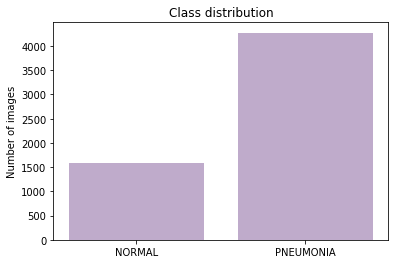

In [14]:
class1 = 1282 + 2992
class0 = 475 + 1108
objects=["NORMAL","PNEUMONIA"]
y_pos = np.arange(len(objects))
count=[class0,class1]
plt.bar(y_pos, count, align='center', alpha=0.5, color=(0.5, 0.35, 0.6, 0.6))
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')


plt.savefig('./Images/Figure4.jpg')
plt.show('./Images/Figure4.jpg')